# This notebook serves as storage for HandsOn examples for algorithm implementation for SQSP

In [1]:
# imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, BasicAer
import numpy as np

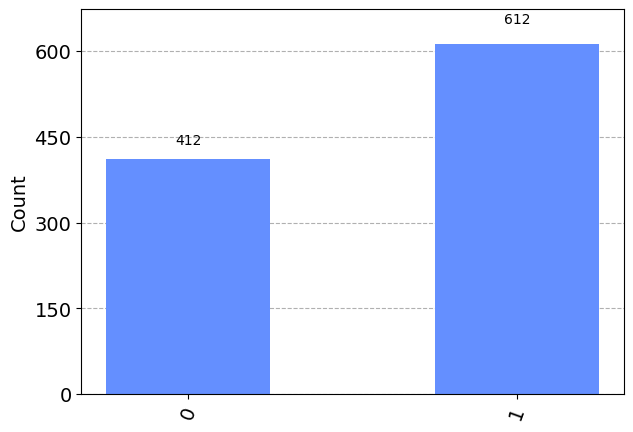

In [2]:
# construct G with alpha = sqrt(0.4), beta = sqrt(0.6)
qc_test = QuantumCircuit(1,1)
qc_test.initialize([np.sqrt(0.4), np.sqrt(0.6)], [0])
qc_test.measure([0], [0])
qc_test.draw('mpl')

# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

from qiskit.visualization import plot_histogram

job = execute(qc_test, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

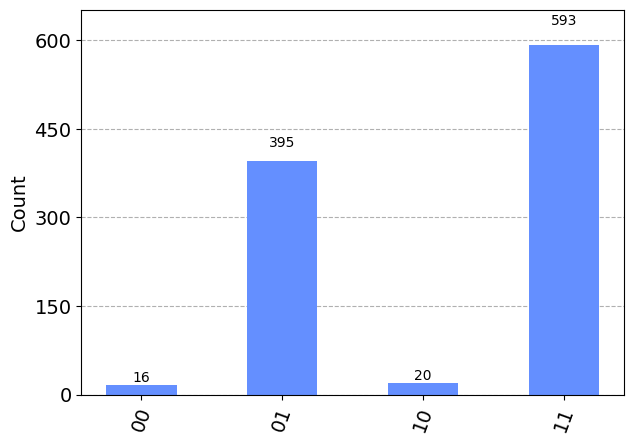

In [3]:
qc_test2 = QuantumCircuit(2,2)
qc_test2.x(0)
### insert code for generation here
alpha = np.sqrt(0.4)
qc_test2.rz(alpha, 1)
qc_test2.ry(2*1/np.cos(alpha), 1)
qc_test2.cx(0,1)
qc_test2.ry(-2*1/np.cos(alpha), 1)
qc_test2.rz(-alpha, 1)
### end of code insertion
qc_test2.measure([0, 1], [0, 1])

# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

from qiskit.visualization import plot_histogram

job = execute(qc_test2, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

## HandsOn Basistate

In [4]:
# create |011> -> qiskit is little endian:
qc_basisstate = QuantumCircuit(3,3)
qc_basisstate.x(0)
qc_basisstate.x(1)
qc_basisstate.measure([0,1,2], [0,1,2])

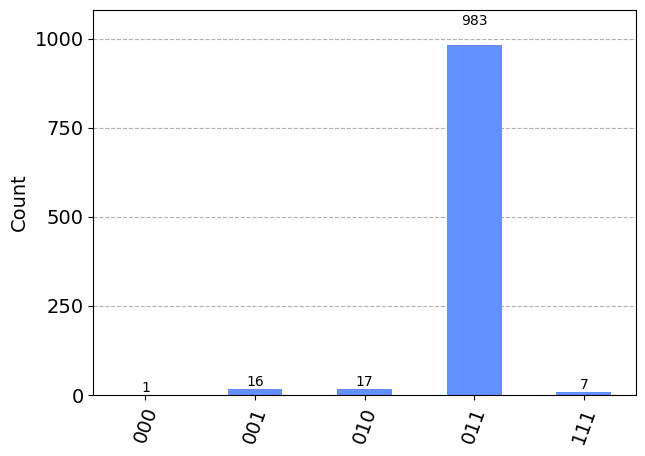

In [5]:
# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

from qiskit.visualization import plot_histogram

job = execute(qc_basisstate, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

## create |phi> = 1/sqrt(2)(|001> + |110>):

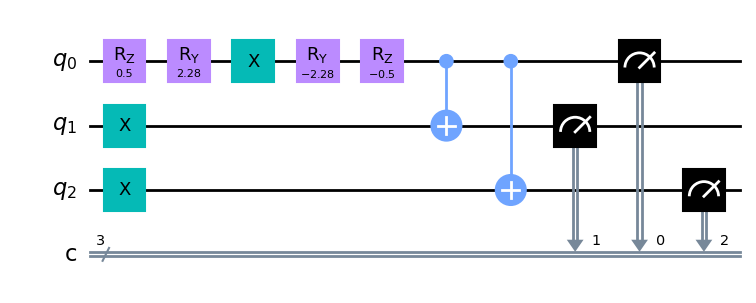

In [127]:
qc_2state = QuantumCircuit(3,3)
#apply x on basis state |110>
qc_2state.x(1)
qc_2state.x(2)

#g-gate
alpha = 1/2
qc_2state.rz(alpha, 0)
qc_2state.ry(2*1/np.cos(alpha), 0)
qc_2state.x(0)
qc_2state.ry(-2*1/np.cos(alpha), 0)
qc_2state.rz(-alpha, 0)

# i = 0
qc_2state.cx(0,1)
qc_2state.cx(0,2)
#our state is now |110> -> zero in i-th entry
qc_2state.measure([0,1,2], [0,1,2,])
qc_2state.draw('mpl')

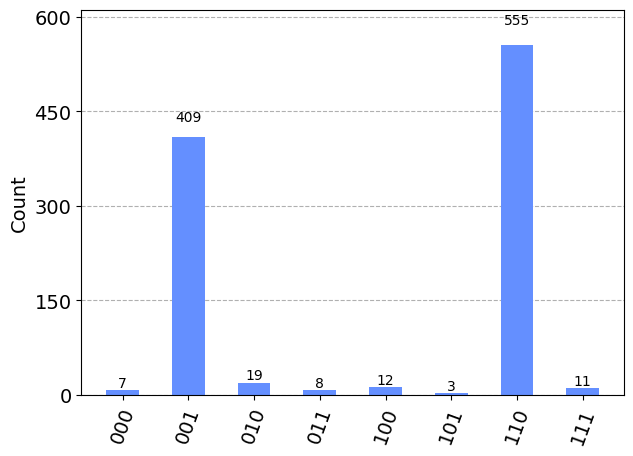

In [128]:
# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

from qiskit.visualization import plot_histogram

job = execute(qc_2state, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

## create |phi> = (sqrt(3)/2)|110> + 1/2|011>: # not equal distribution

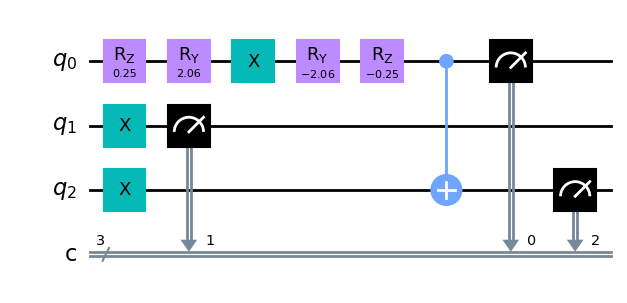

In [123]:
qc_2state = QuantumCircuit(3,3)
#apply x on basis state |110>
qc_2state.x(1)
qc_2state.x(2)

#g-gate
alpha = 1/4
qc_2state.rz(alpha, 0)
qc_2state.ry(2*1/np.cos(alpha), 0)
qc_2state.x(0)
qc_2state.ry(-2*1/np.cos(alpha), 0)
qc_2state.rz(-alpha, 0)

# i = 0
qc_2state.cx(0,2)
#our state is now |110> -> zero in i-th entry
qc_2state.measure([0,1,2], [0,1,2,])
qc_2state.draw('mpl')

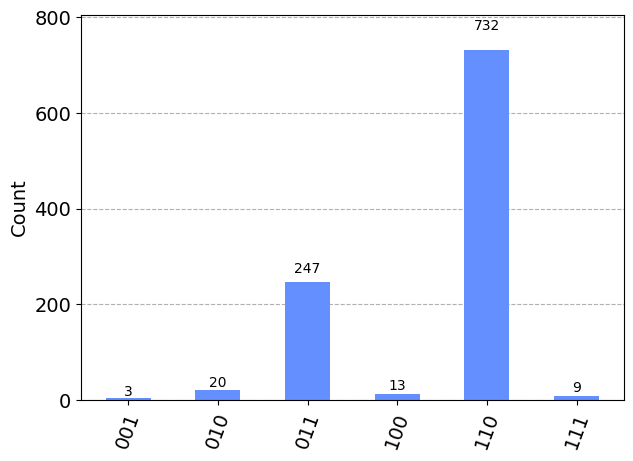

In [124]:
# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

from qiskit.visualization import plot_histogram

job = execute(qc_2state, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

## try 3 states |phi> = 1/sqrt(3)(|001> + |100> + |111>) -> from paper

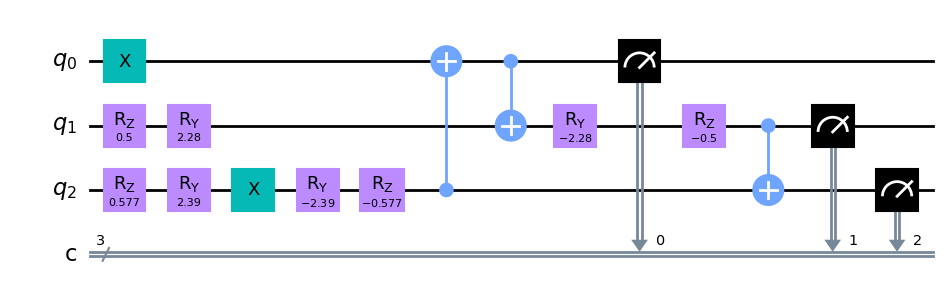

In [97]:
qc_3state = QuantumCircuit(3,3)

qc_3state.x(0)

## g on 3
alpha = 1/np.sqrt(3) #1/sqrt(3) -> sqrt(2/3)
qc_3state.rz(alpha, 2)
qc_3state.ry(2*1/np.cos(alpha), 2)
qc_3state.x(2)
qc_3state.ry(-2*1/np.cos(alpha), 2)
qc_3state.rz(-alpha, 2)
## end g


qc_3state.cx(2,0)

## f on 2 controlled on 1
alpha = 1/2 #both states have equal probability
qc_3state.rz(alpha, 1)
qc_3state.ry(2*1/np.cos(alpha), 1)
qc_3state.cx(0,1)
qc_3state.ry(-2*1/np.cos(alpha), 1)
qc_3state.rz(-alpha, 1)
## end of f

qc_3state.cx(1,2)

qc_3state.measure([0,1,2], [0,1,2])

qc_3state.draw('mpl')

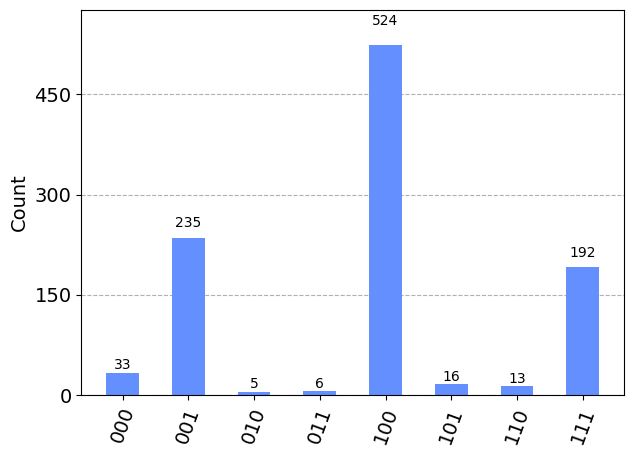

In [98]:
# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

from qiskit.visualization import plot_histogram

job = execute(qc_3state, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

## try 3 states |phi> = 1/sqrt(3)(|001> + |100> + |111>) -> from HandsOn

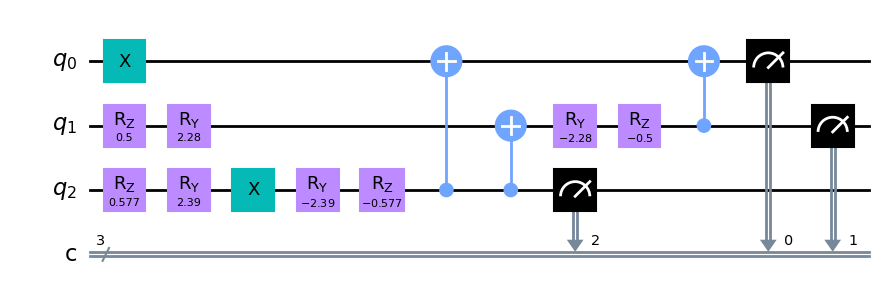

In [142]:
qc_3state = QuantumCircuit(3,3)

qc_3state.x(0)

## g on 3
alpha = 1/np.sqrt(3) #1/sqrt(3) -> sqrt(2/3)
qc_3state.rz(alpha, 2)
qc_3state.ry(2*1/np.cos(alpha), 2)
qc_3state.x(2)
qc_3state.ry(-2*1/np.cos(alpha), 2)
qc_3state.rz(-alpha, 2)
## end g


qc_3state.cx(2,0)

## f on 2 controlled on 1
alpha = 1/2 #both states have equal probability
qc_3state.rz(alpha, 1)
qc_3state.ry(2*1/np.cos(alpha), 1)
qc_3state.cx(2,1)
qc_3state.ry(-2*1/np.cos(alpha), 1)
qc_3state.rz(-alpha, 1)
## end of f

qc_3state.cx(1,0)

qc_3state.measure([0,1,2], [0,1,2])

qc_3state.draw('mpl')

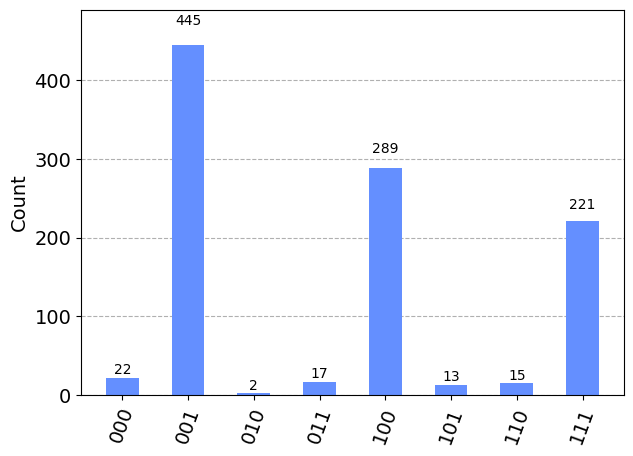

In [143]:
# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

from qiskit.visualization import plot_histogram

job = execute(qc_3state, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

## try 3 states |phi> = 1/sqrt(3)(|001> + |100> + |111>) -> from HandsOn algo

In [ ]:
## backup
qc_3state = QuantumCircuit(3,3)

## algorithm 1 2nd run -> merge (100) and (001) to (001)
qc_3state.cx(2,0)
### apply g on 3 (not controlled)
alpha = 1/np.sqrt(3) #1/sqrt(3) -> sqrt(2/3)
qc_3state.rz(alpha, 2)
qc_3state.ry(2*1/np.cos(alpha), 2)
qc_3state.x(2)
qc_3state.ry(-2*1/np.cos(alpha), 2)
qc_3state.rz(-alpha, 2)

## algorithm 1 1st run -> merge (100) and (111) to (100)
qc_3state.cx(2,0)
qc_3state.cx(2,1)

### apply f on 2 controlled on 1
alpha = 1/np.sqrt(2) #both states have equal probability sqrt(c1**2/(c1**2+c2**2) = sqrt(1/3)/(2/3) = 1/sqrt(2))
qc_3state.rz(alpha, 1)
qc_3state.ry(2*1/np.cos(alpha), 1)
qc_3state.cx(2, 1)
qc_3state.ry(-2*1/np.cos(alpha), 1)
qc_3state.rz(-alpha, 1)


## rest of algorithm2 -> on 001
qc_3state.x(0)
#qc_3state = qc_3state.inverse()

qc_3state.measure([0,1,2], [0,1,2])

qc_3state.draw('mpl')

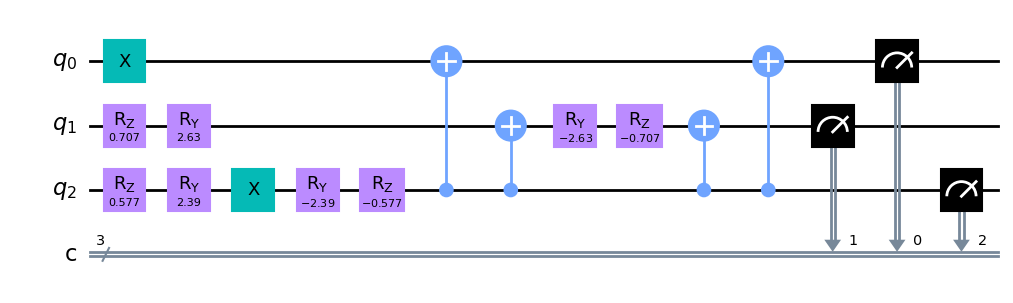

In [140]:
qc_3state = QuantumCircuit(3,3)

## algorithm 1 1st run -> merge (100) and (111) to (100)
qc_3state.cx(2,0)
qc_3state.cx(2,1)

### apply f on 2 controlled on 1
alpha = 1/np.sqrt(2) #both states have equal probability sqrt(c1**2/(c1**2+c2**2) = sqrt(1/3)/(2/3) = 1/sqrt(2))
qc_3state.rz(alpha, 1)
qc_3state.ry(2*1/np.cos(alpha), 1)
qc_3state.cx(2, 1)
qc_3state.ry(-2*1/np.cos(alpha), 1)
qc_3state.rz(-alpha, 1)

## algorithm 1 2nd run -> merge (100) and (001) to (001)
qc_3state.cx(2,0)
### apply g on 3 (not controlled)
alpha = 1/np.sqrt(3) #1/sqrt(3) -> sqrt(2/3)
qc_3state.rz(alpha, 2)
qc_3state.ry(2*1/np.cos(alpha), 2)
qc_3state.x(2)
qc_3state.ry(-2*1/np.cos(alpha), 2)
qc_3state.rz(-alpha, 2)

## rest of algorithm2 -> on 001
qc_3state.x(0)
qc_3state = qc_3state.inverse()

qc_3state.measure([0,1,2], [0,1,2])

qc_3state.draw('mpl')

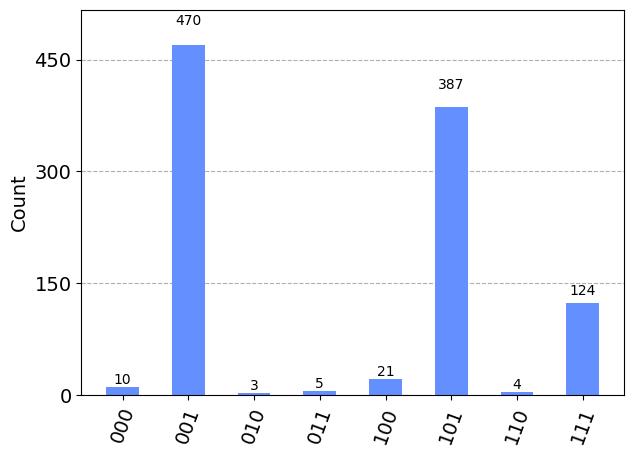

In [141]:
# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

from qiskit.visualization import plot_histogram

job = execute(qc_3state, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!

## try 3 states |phi> = 1/sqrt(3)(|001> + |110> + |011>)

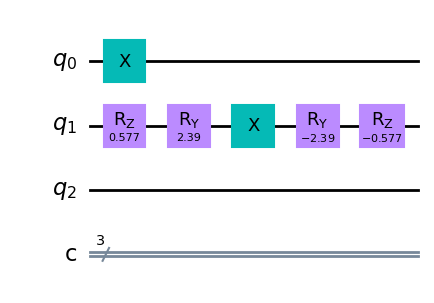

In [83]:
qc_3state = QuantumCircuit(3,3)

#merge |001> and |110> -> merged to |110>
#apply x on basis state |110>
qc_3state.x(0)

#controlled-g-gate
alpha = 1/np.sqrt(3) #both states have equal probability
qc_3state.rz(alpha, 1)
qc_3state.ry(2*1/np.cos(alpha), 1)
qc_3state.x(1)
qc_3state.ry(-2*1/np.cos(alpha), 1)
qc_3state.rz(-alpha, 1)

# i = 0
qc_3state.draw('mpl')

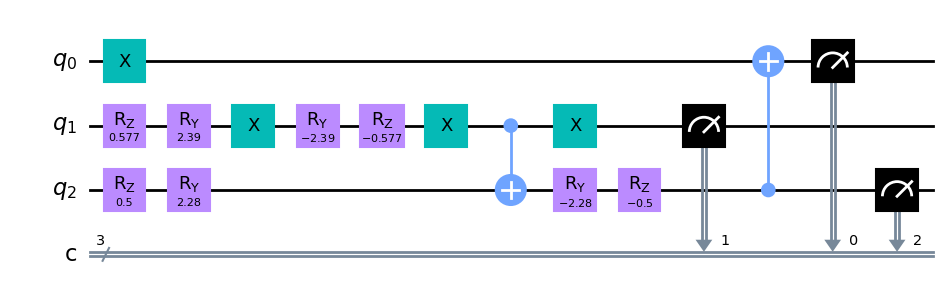

In [84]:
#our state is now |110> -> zero in i-th entry
#qc_3state = QuantumCircuit(3,3)

#merge |110> and |011> -> merged to |110>
# i = 2
alpha = 1/2 #both states have equal probability -> sqrt(c1**2/(c1**2+c2**2)) = sqrt((1/3)/2/3) = 1/2
qc_3state.rz(alpha, 2)
qc_3state.ry(2*1/np.cos(alpha), 2)
qc_3state.x(1)
qc_3state.mcx([1], 2)
qc_3state.x(1)
qc_3state.ry(-2*1/np.cos(alpha), 2)
qc_3state.rz(-alpha, 2)

qc_3state.cx(2,0)

qc_3state.measure([0,1,2], [0,1,2])
qc_3state.draw('mpl')

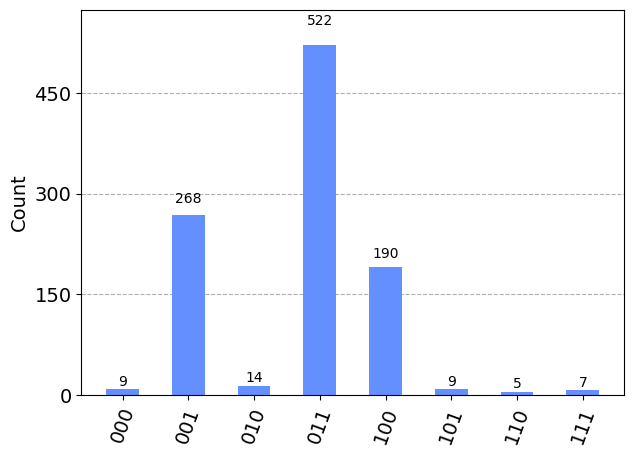

In [85]:
# use fake santiago backend
from qiskit.providers.fake_provider import FakeSantiagoV2
santiago = FakeSantiagoV2()
santiago.operations

from qiskit.visualization import plot_histogram

job = execute(qc_3state, santiago, shots=1024) #we specify our job, which circuit to execute and how many times
result = job.result() #we extract the results from the job
counts = result.get_counts() #this time, we are not getting the state, but the counts!
plot_histogram(counts) #a new plotting method! this works for counts obviously!